In [1]:
from tqdm import tqdm 
import numpy as np

from sempler.generators import dag_avg_deg
from sempler import LGANM

import ges
from scores import HuberScore
from our_utils import *

import matplotlib.pyplot as plt

from noisy_causal_discovery import noisy_fit, alpha_tilde

In [2]:
# setting experimental parameters
trials = 100
avg_deg = 1
err_lvl = 0.05

# setting parameters to noisy GES
max_iter = 5
delta = 0.5

# setting dimension and sample increments
d_inc = 5
n_inc = 100

#initializing results matrix
results_rand = np.zeros((4, 5))

In [3]:
eps = 0.02 # change to 0.04 for 2nd plot

eps_max, eps_thrsh = eps/(4*max_iter), eps/4
cum_eps = 2*(max_iter*eps_max + eps_thrsh)

for d_iter in range(results_rand.shape[0]):
    for n_iter in range(results_rand.shape[1]):

        if results_rand[d_iter, n_iter] != 0:
            continue

        d, n = d_inc * (d_iter+1), n_inc * (n_iter+1)

        err_lvl_adj = alpha_tilde(err_lvl, eps, n)

        for trial in tqdm(range(trials)):
            np.random.seed(trial)
            G = dag_avg_deg(d, avg_deg, w_min=2, w_max=4)
            data = LGANM(G, (0,0), (1,1)).sample(n=n) 

            cpdag_estimate, _ = noisy_fit(HuberScore(data, delta=delta), eps_max=eps_max, eps_thrsh=eps_thrsh, max_iter=max_iter)

            results_rand[d_iter, n_iter] += (1-is_valid(data, cpdag_estimate, err_lvl_adj, G))
                                            # To get true effect coverage replace the above with 
                                            # is_valid(data, cpdag_estimate, err_lvl, G, true_effect=True)
                    
        results_rand[d_iter, n_iter] /= trials
        print("eps, d, n=", eps, d, n, ", metrics=", results_rand[d_iter, n_iter])

100%|██████████| 100/100 [00:28<00:00,  3.53it/s]


eps, d, n= 0.02 5 100 , metrics= 0.02


100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


eps, d, n= 0.02 5 200 , metrics= 0.02


100%|██████████| 100/100 [00:53<00:00,  1.87it/s]


eps, d, n= 0.02 5 300 , metrics= 0.02


100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


eps, d, n= 0.02 5 400 , metrics= 0.03


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


eps, d, n= 0.02 5 500 , metrics= 0.0


100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


eps, d, n= 0.02 10 100 , metrics= 0.02


100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


eps, d, n= 0.02 10 200 , metrics= 0.02


100%|██████████| 100/100 [4:02:44<00:00, 145.65s/it]   


eps, d, n= 0.02 10 300 , metrics= 0.02


100%|██████████| 100/100 [6:08:06<00:00, 220.86s/it]   


eps, d, n= 0.02 10 400 , metrics= 0.0


100%|██████████| 100/100 [28:10<00:00, 16.90s/it]  


eps, d, n= 0.02 10 500 , metrics= 0.02


100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


eps, d, n= 0.02 15 100 , metrics= 0.02


100%|██████████| 100/100 [01:58<00:00,  1.19s/it]


eps, d, n= 0.02 15 200 , metrics= 0.03


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


eps, d, n= 0.02 15 300 , metrics= 0.03


100%|██████████| 100/100 [03:10<00:00,  1.90s/it]


eps, d, n= 0.02 15 400 , metrics= 0.02


100%|██████████| 100/100 [03:27<00:00,  2.07s/it]


eps, d, n= 0.02 15 500 , metrics= 0.02


100%|██████████| 100/100 [02:00<00:00,  1.21s/it]


eps, d, n= 0.02 20 100 , metrics= 0.03


100%|██████████| 100/100 [02:28<00:00,  1.49s/it]


eps, d, n= 0.02 20 200 , metrics= 0.03


100%|██████████| 100/100 [03:24<00:00,  2.05s/it]


eps, d, n= 0.02 20 300 , metrics= 0.0


100%|██████████| 100/100 [04:50<00:00,  2.90s/it]


eps, d, n= 0.02 20 400 , metrics= 0.02


100%|██████████| 100/100 [05:53<00:00,  3.54s/it]

eps, d, n= 0.02 20 500 , metrics= 0.01


[NOTE]: To get the true effect coverage, simply add the flag true_effect=True in the is_valid function, as per the comment.

In [4]:
d_list = (np.arange(4)+1)*d_inc
n_list = (np.arange(5)+1)*n_inc

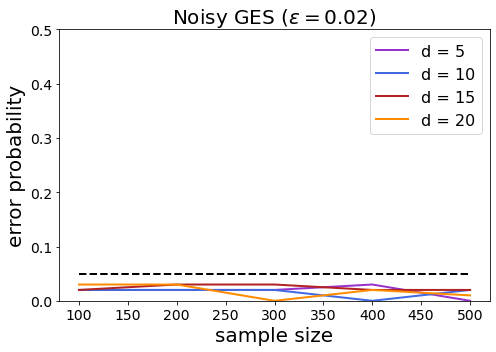

In [5]:
plt.figure(figsize=(7, 5))
colors=['darkorchid', 'royalblue', 'firebrick', 'darkorange', 'forestgreen']
for d_iter in range(4):
    d = d_inc * (d_iter+1)
    plt.plot(n_list, results_rand[d_iter], color=colors[d_iter], label="d = " + str(d), linewidth=2)
plt.plot(n_list, err_lvl*np.ones(5), '--', color="black", linewidth=2)
plt.xlabel("sample size", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("error probability", fontsize=20)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.title("Noisy GES ($\epsilon=0.02$)", fontsize=20)
plt.ylim((0.0, 0.5))
plt.tight_layout()
plt.savefig('noisy-ges-proj-eps002.pdf')